In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df = pd.read_csv("23-boston.csv", header=None, delimiter=r"\s+", names=column_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
import math
def plot_all_histograms(df, title_prefix = ""): 
    numeric_cols = df.select_dtypes(include = [np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    plt.figure(figsize=(5*n_cols, 4*n_rows))

    for i, col in enumerate(numeric_cols,1): 
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], bins = 30, kde=True)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel("")
        plt.ylabel("")
        
    plt.tight_layout()
    plt.show()

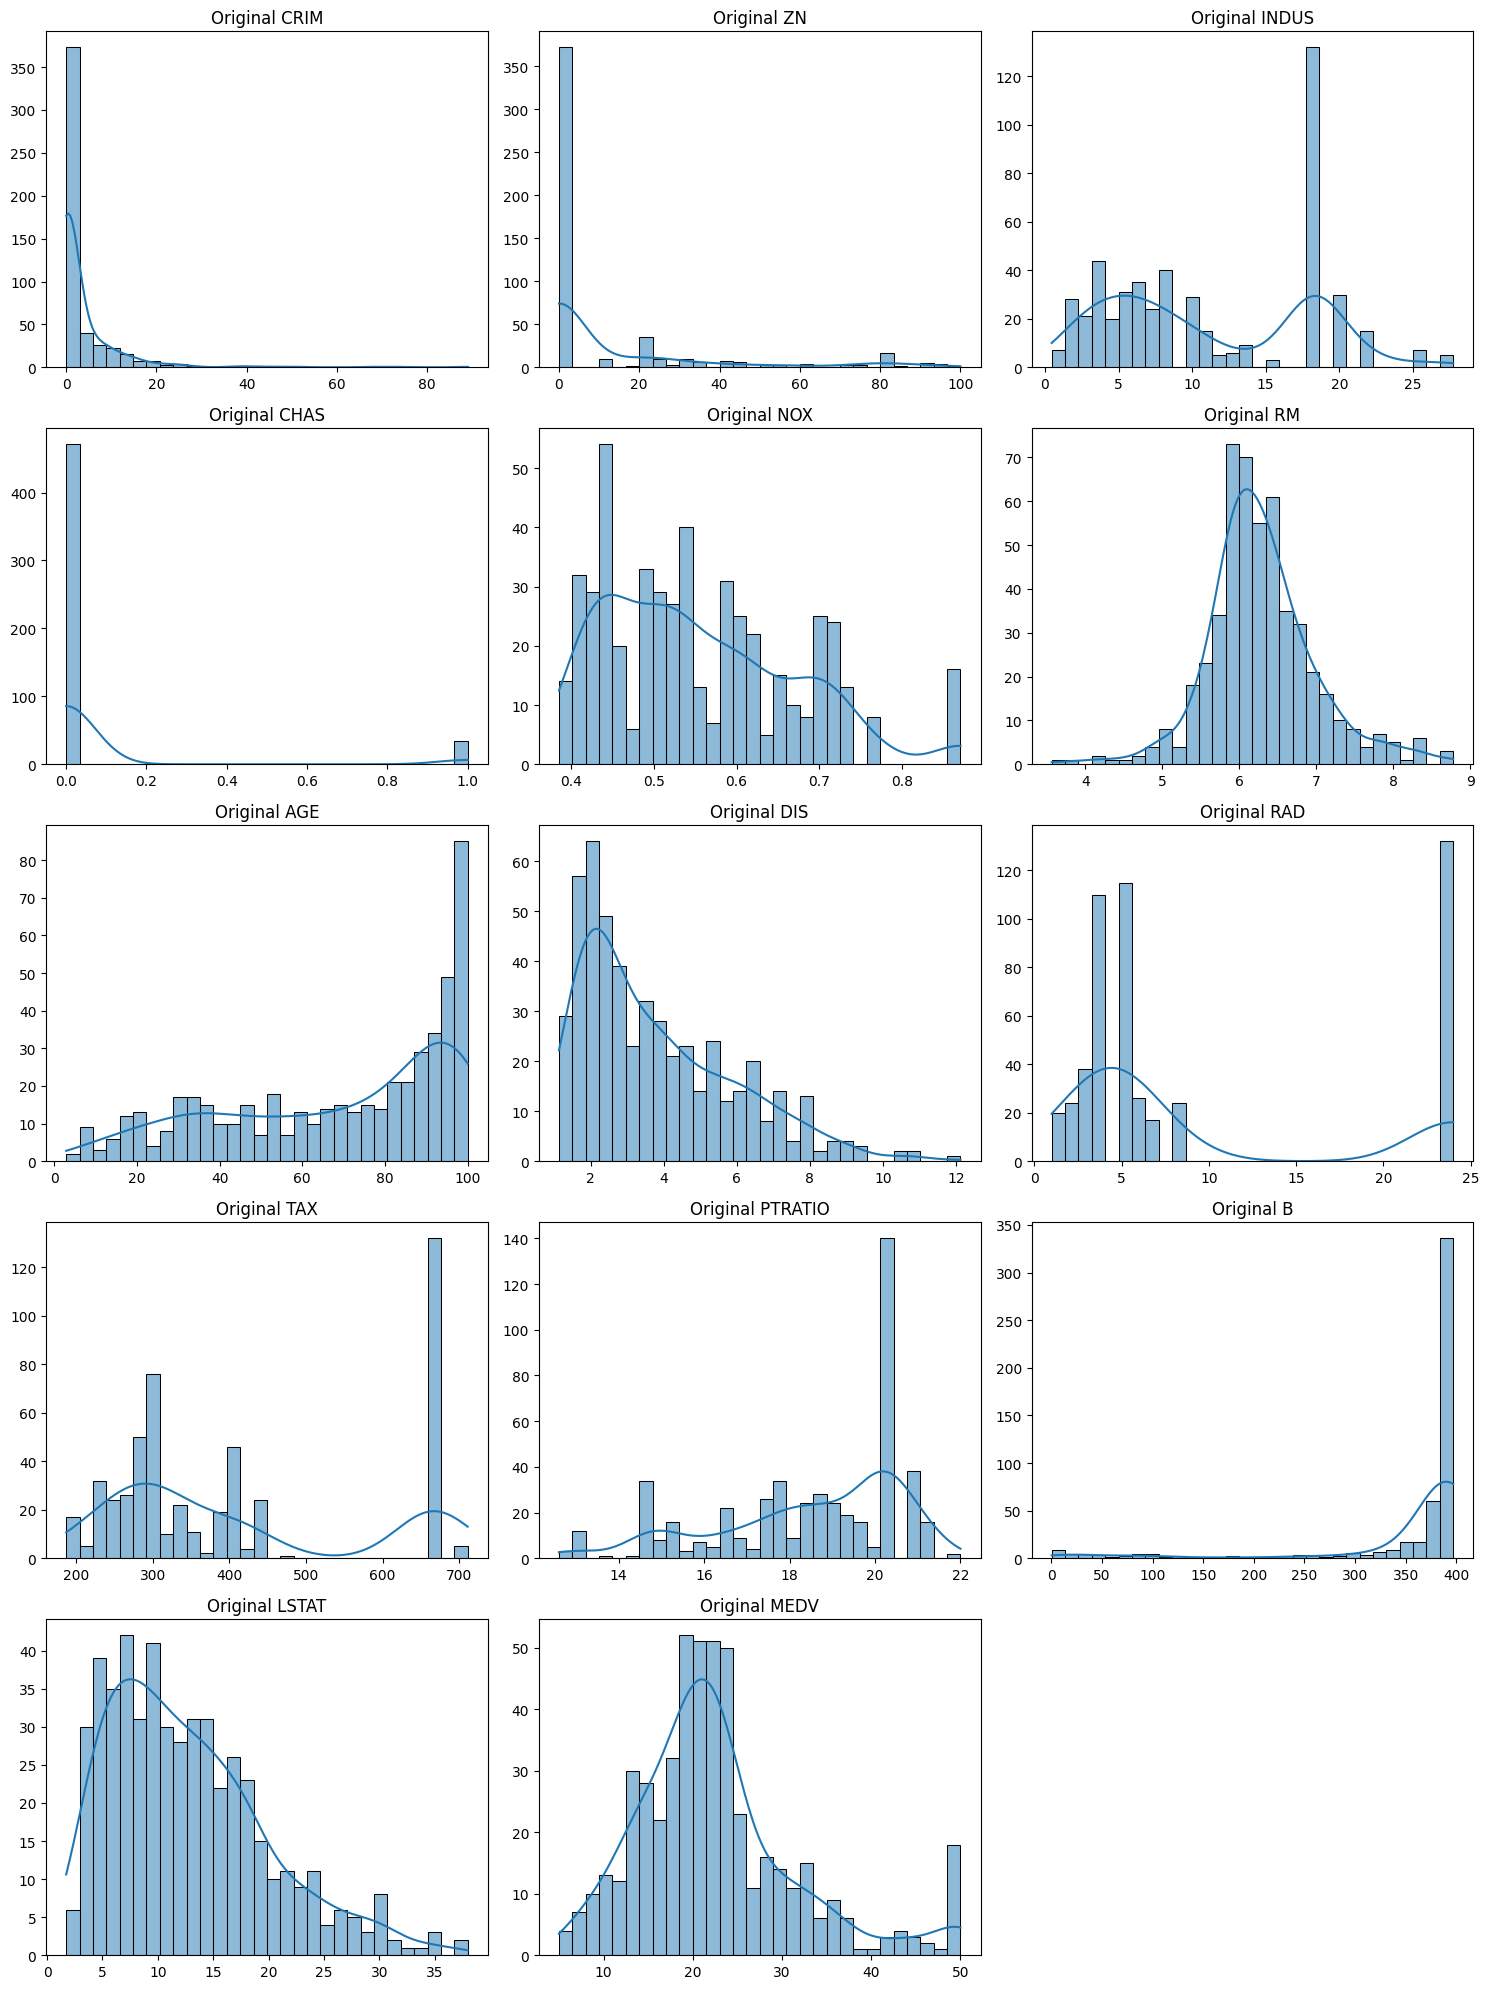

In [7]:
plot_all_histograms(df, title_prefix="Original")

In [8]:
from scipy.stats import skew 

In [9]:
df.apply(skew).sort_values(ascending=False)

CRIM       5.207652
CHAS       3.395799
ZN         2.219063
MEDV       1.104811
DIS        1.008779
RAD        1.001833
LSTAT      0.903771
NOX        0.727144
TAX        0.667968
RM         0.402415
INDUS      0.294146
AGE       -0.597186
PTRATIO   -0.799945
B         -2.881798
dtype: float64

In [10]:
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [11]:
from sklearn.preprocessing import PowerTransformer 

In [12]:
pt_X = PowerTransformer(method="yeo-johnson")

In [13]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [14]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)

In [15]:
X_train_transformed_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.904167,1.724429,-1.219281,-0.267615,-1.133724,0.654830,-1.320696,1.297076,-0.255374,0.244488,-1.427362,0.426553,-1.322242
1,1.605896,-0.588616,1.011100,-0.267615,1.465402,-0.490305,0.689192,-1.115580,1.457243,1.370436,0.848622,-2.703630,2.139134
2,-0.925383,-0.588616,-1.492987,-0.267615,-0.496175,-0.175553,-0.053289,0.037511,-0.944274,-1.975622,-0.502857,0.350835,0.303698
3,0.999995,-0.588616,1.161199,-0.267615,2.026049,-0.985039,0.975581,-1.456339,-0.255374,0.275674,-1.555351,-0.550002,1.209644
4,-0.628294,-0.588616,0.138417,-0.267615,-1.475942,-0.043701,-1.910821,0.936406,-0.551621,-0.473029,0.216963,0.073562,-0.622936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.668295,-0.588616,1.011100,-0.267615,1.072096,1.447764,1.100495,-1.734661,1.457243,1.370436,0.848622,0.643031,0.342306
400,-0.390949,-0.588616,1.382524,-0.267615,0.752694,-0.654775,0.996311,-0.517389,-0.551621,0.472960,1.592342,0.396688,0.542831
401,1.366441,-0.588616,1.011100,-0.267615,1.206460,0.184264,1.021234,-1.275079,1.457243,1.370436,0.848622,0.643031,1.013945
402,-0.636275,1.664783,-0.676234,-0.267615,-1.216540,-0.973231,-0.000938,1.644135,0.171014,-0.249768,0.159469,0.409545,0.922866


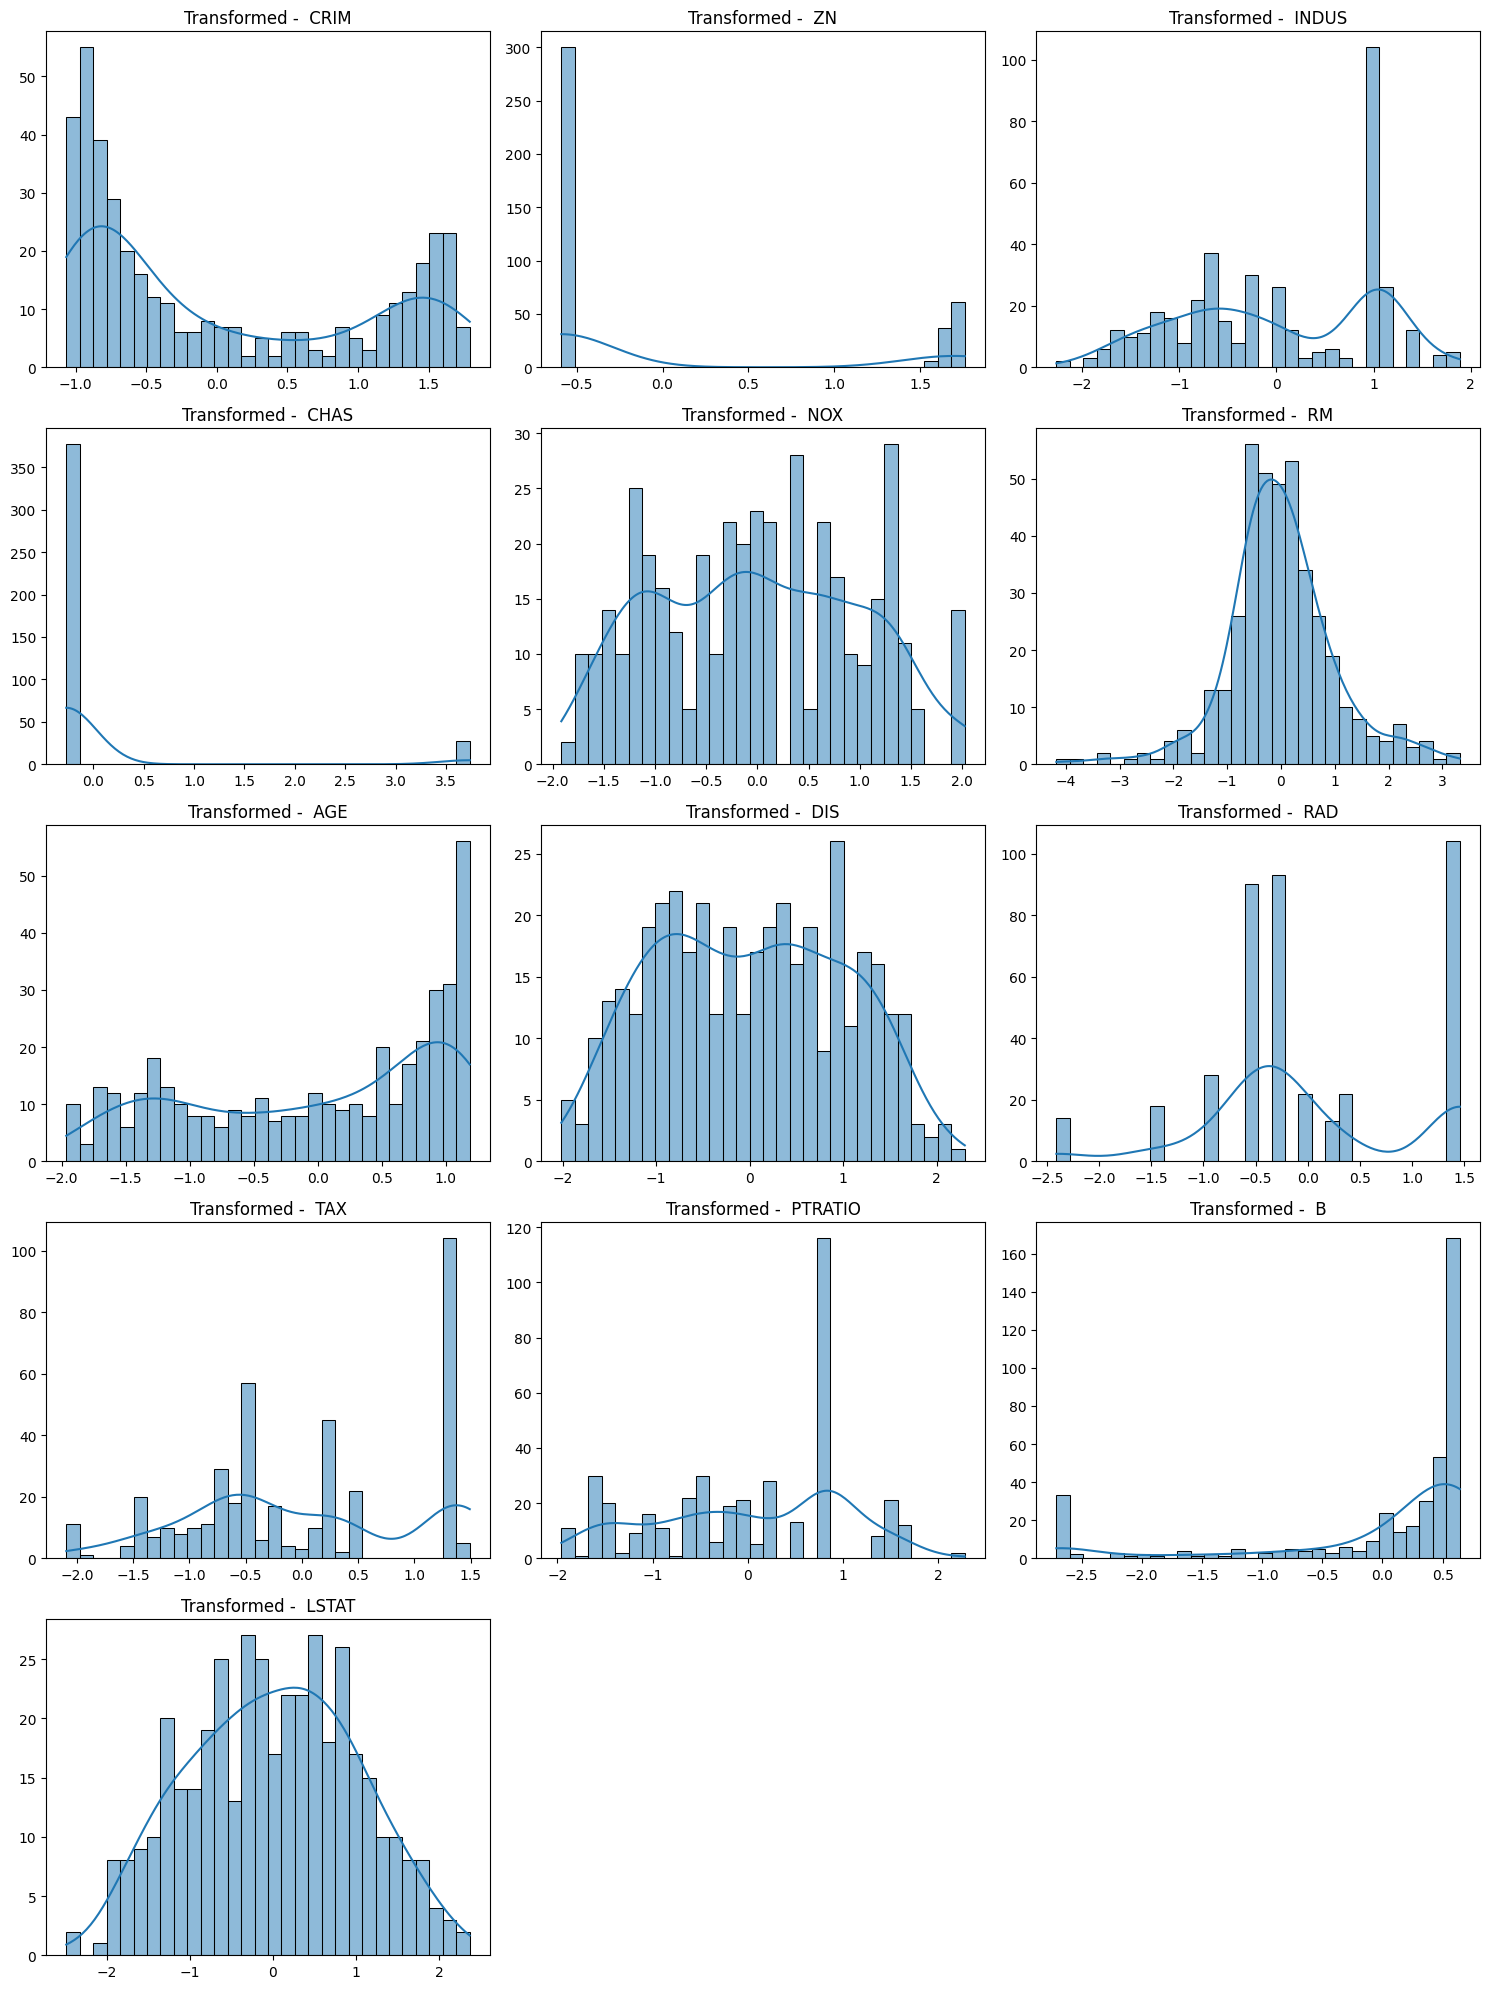

In [16]:
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")

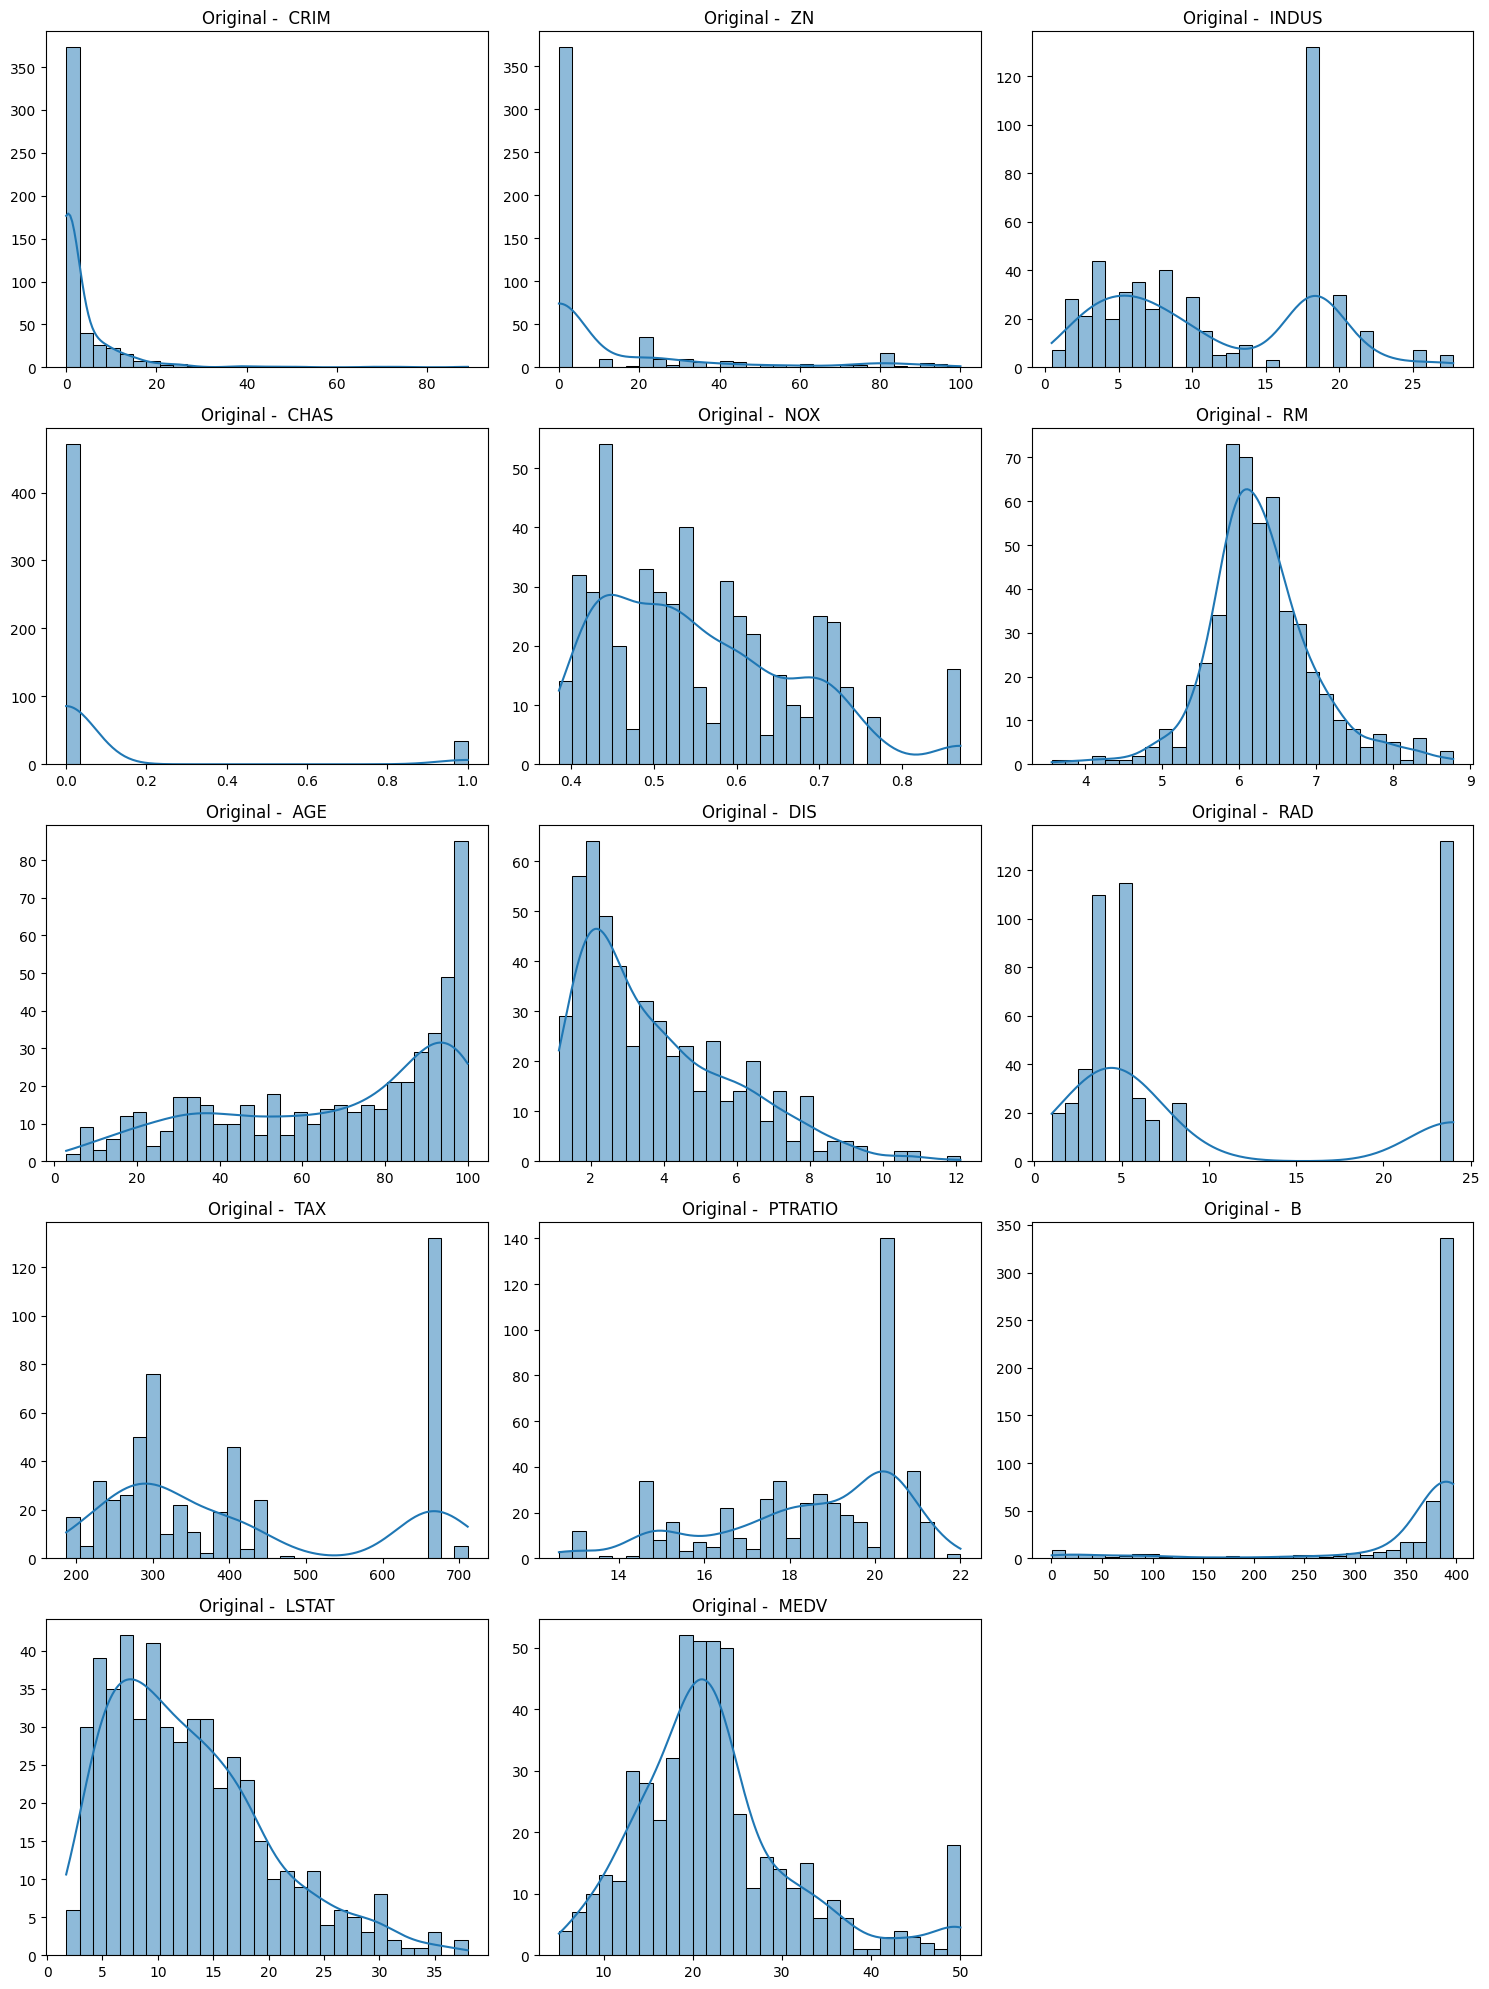

In [17]:
plot_all_histograms(df, "Original - ")

In [18]:
from scipy.stats import boxcox

In [19]:
y_train_transformed, lambda_y = boxcox(y_train)

In [20]:
lambda_y

np.float64(0.19365111420999034)

In [21]:
def inverse_boxcox(y, lambda_): 
    if lambda_ == 0: 
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_transformed, y_train_transformed)

LinearRegression()

In [23]:
y_pred_transformed = model.predict(X_test_transformed)

In [24]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error 
print("R2 Score: ", r2_score(y_test, y_pred_transformed))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_transformed))

R2 Score:  -3.846659075199055
Mean Squared Error:  374.7984072518836


In [26]:
print("R2 Score: ", r2_score(y_test, y_pred_original))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_original))

R2 Score:  0.7755639716957536
Mean Squared Error:  17.355927997662064


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.6920749038652133
Mean Squared Error:  23.812245465080757
